In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer



In [38]:
dataset = pd.read_csv("/Users/rohitnair/Downloads/movie_reviews-2.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])



In [39]:

dataset.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive


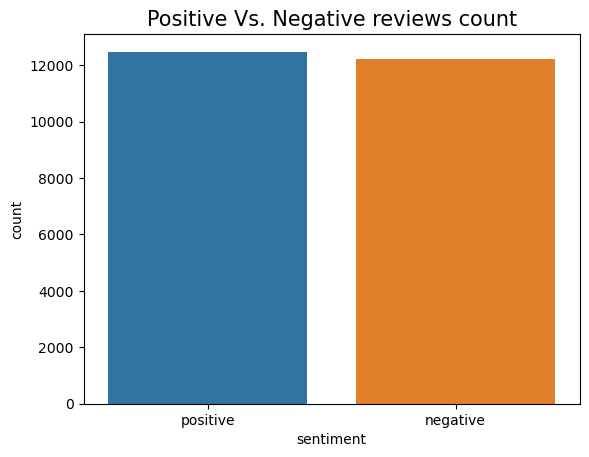

In [40]:


sns.countplot(x ='sentiment', data = dataset)

plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()




In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rohitnair/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rohitnair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rohitnair/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /Users/rohitnair/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [42]:
 
cleaned_dataset = dataset
cleaned_dataset['review'] = cleaned_dataset['review'].apply(lambda x : clean_text(x))


In [43]:


cleaned_dataset.head()

,review,sentiment
0,one reviewer mentioned watching 1 oz episode y...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,petter matteis love time money visually stunni...,positive
4,probably alltime favorite movie story selfless...,positive


In [44]:

#to encode categorical to numerical for classification
#encode = { 'negative' : 0 , 'positive' : 1}
#cleaned_dataset["sentiment"] = cleaned_dataset["sentiment"].apply(lambda x : encode[x])


#X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['review'], cleaned_dataset['sentiment'], test_size=0.2, random_state=42)



In [45]:
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['review'], cleaned_dataset['sentiment'], test_size=0.2, random_state=42)
len(X_train)

19759

In [46]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(y_train)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

y_train_encoded = y_train_encoded.astype(str).astype(int)
y_test_encoded = y_test_encoded.astype(str).astype(int)



#print(test_encoded_labels)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

#tokenizer = Tokenizer(num_words=1000)
tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

#print("The document count",tokenizer.document_count)
#print("The count of words",tokenizer.word_counts)
#print("word index = " , tokenizer.word_index )


word_index = {}
word_index = tokenizer.word_index
print(len(word_index.keys()))
#print(word_index)
vocabulary = list((word_index.keys()))


X_train_indexed = tokenizer.texts_to_sequences(X_train)
#print(X_train_indexed[:10])
print(type(X_train))

X_test_indexed = tokenizer.texts_to_sequences(X_test)



padded_X_train = pad_sequences(X_train_indexed, maxlen=200)
padded_X_test = pad_sequences(X_test_indexed, maxlen=200)

padded_X_train= np.array(padded_X_train)
padded_X_test = np.array(padded_X_test)
#print(padded_X_test[:10])

print('Vocabulary : {}'.format(vocabulary))

99734
<class 'pandas.core.series.Series'>


In [48]:
glove_dictionary = {}
with open('/Users/rohitnair/Downloads/glove.6B.200d.txt') as file:
    for each_line in file:
        words_in_line, coeff_cients = each_line.split(maxsplit=1)
        coeff_cients = np.array(coeff_cients.split(),dtype = float)
        glove_dictionary[words_in_line] = coeff_cients

In [49]:

embedding_matrix = np.zeros((len(vocabulary), 200))

for i in vocabulary:
    if i in glove_dictionary.keys():
        embedding_matrix[word_index[i]] = glove_dictionary[i]


In [50]:
embedding_matrix.shape


(99734, 200)

Sample output : (99987, 200)

In [51]:
import tensorflow as tf

tf.random.set_seed(42)


def build_model(embedding_matrix):

    model = tf.keras.Sequential()
    
    #model.add(tf.keras.layers.Embedding(len(word_index.keys()) ,128 ,input_length= 200 ))
    #embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False)
    model.add(tf.keras.layers.Embedding(input_dim = embedding_matrix.shape[0] , output_dim =embedding_matrix.shape[1] ,input_length= 200 ,weights = [embedding_matrix] ,trainable=False ))



    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))


    
    
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))


    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


    
    model.compile( loss='binary_crossentropy',optimizer='adam', 
                  metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.Precision(),
                tf.keras.metrics.Recall(), 'accuracy'])


    return model




In [52]:

model = build_model(embedding_matrix)
model.summary()

history = model.fit(padded_X_train, y_train_encoded, batch_size=64,epochs=10, validation_data=[padded_X_test, y_test_encoded])

print(history.history['loss'])
print(history.history['accuracy']) 

#results = model.evaluate(X_val_pad, y_val)
#print('AUC: {}'.format(*results))



Metal device set to: Apple M1


2023-03-12 23:39:51.125333: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-12 23:39:51.127632: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          19946800  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

2023-03-12 23:39:51.836380: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-12 23:39:53.469558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 23:39:53.799004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 23:39:53.817189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 23:39:54.774049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 23:39:54.789079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


309/309 [==============================] - ETA: 0s - loss: 0.5209 - auc: 0.8222 - precision: 0.7439 - recall: 0.7566 - accuracy: 0.7449

2023-03-12 23:40:29.640741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 23:40:29.766126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 23:40:29.774512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


309/309 [==============================] - 44s 128ms/step - loss: 0.5209 - auc: 0.8222 - precision: 0.7439 - recall: 0.7566 - accuracy: 0.7449 - val_loss: 0.4767 - val_auc: 0.8843 - val_precision: 0.7051 - val_recall: 0.9029 - val_accuracy: 0.7626
Epoch 2/10
309/309 [==============================] - 36s 117ms/step - loss: 0.3914 - auc: 0.9052 - precision: 0.8285 - recall: 0.8424 - accuracy: 0.8319 - val_loss: 0.3879 - val_auc: 0.9205 - val_precision: 0.8345 - val_recall: 0.8466 - val_accuracy: 0.8393
Epoch 3/10
309/309 [==============================] - 37s 118ms/step - loss: 0.3411 - auc: 0.9284 - precision: 0.8503 - recall: 0.8654 - accuracy: 0.8547 - val_loss: 0.3290 - val_auc: 0.9359 - val_precision: 0.8614 - val_recall: 0.8580 - val_accuracy: 0.8599
Epoch 4/10
309/309 [==============================] - 37s 120ms/step - loss: 0.2956 - auc: 0.9466 - precision: 0.8733 - recall: 0.8826 - accuracy: 0.8758 - val_loss: 0.3053 - val_auc: 0.9452 - val_precision: 0.8602 - val_recall: 0.886

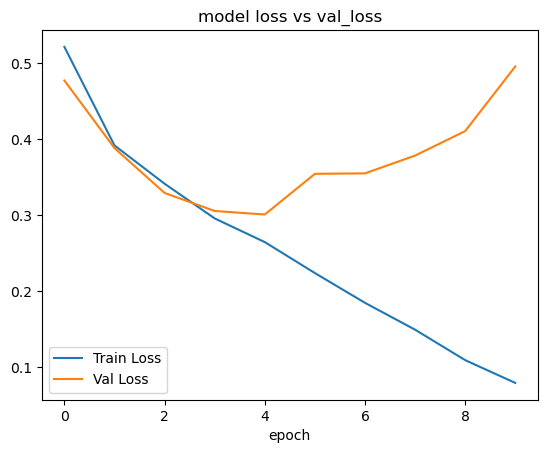

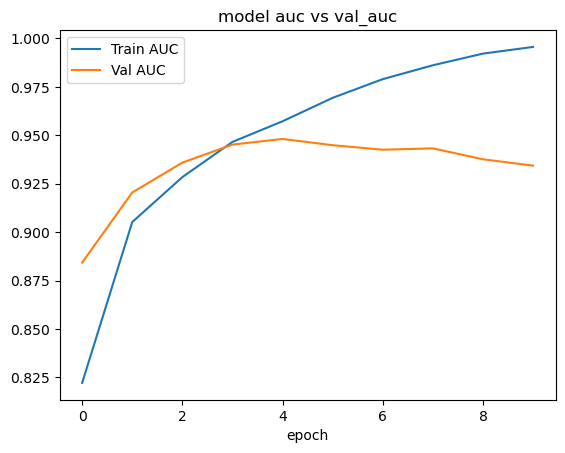

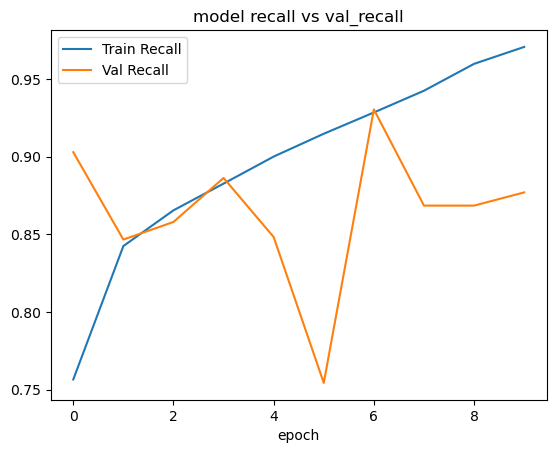

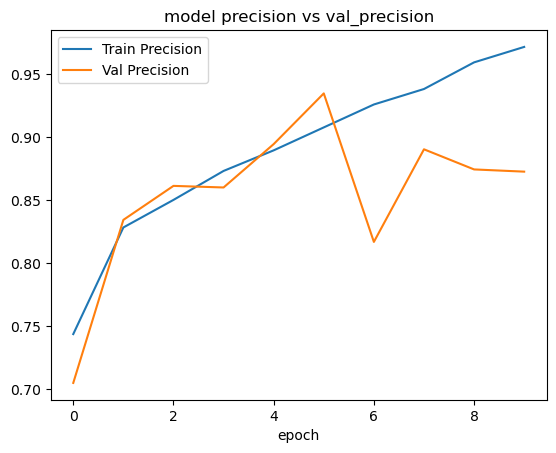

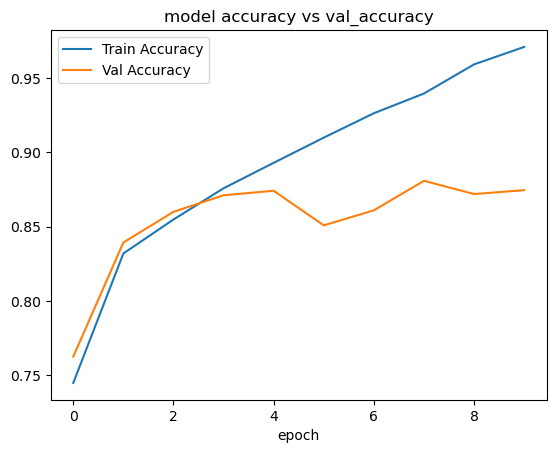

In [53]:
import matplotlib.pyplot as plt

#history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

# Plot the train and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('model loss vs val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Plot the train and validation AUC
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.title('model auc vs val_auc')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Plot the train and validation recall
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Val Recall')
plt.title('model recall vs val_recall')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Plot the train and validation precision
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Val Precision')
plt.title('model precision vs val_precision')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Plot the train and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('model accuracy vs val_accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


In [54]:


import pickle 
with open('lstm_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://cb48da0f-d952-4859-bd9b-aa8a9b1be441/assets


INFO:tensorflow:Assets written to: ram://cb48da0f-d952-4859-bd9b-aa8a9b1be441/assets


In [55]:

saved_model = pickle.load(open('lstm_classifier.pkl', 'rb'))



In [56]:
def predict_review(review):
    
    review = clean_text(review)
    review = pd.Series(review)

    review = tokenizer.texts_to_sequences(review)
    review = pad_sequences(review, maxlen=200)

    
    pred = saved_model.predict(review)
    if np.mean(pred) > 0.5 : 
        p = 1
    else : 
        p = 0

    
    return p



In [57]:
# Do not edit this cell

for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    p = predict_review(review)
    print(f'{review[:100]} -> {p}')
    

2023-03-12 23:46:29.690982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 23:46:29.784881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 23:46:29.794109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 992ms/step
If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1
1/1 [==============================] - 0s 63ms/step
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0
1/1 [==============================] - 0s 58ms/step
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1
1/1 [==============================] - 0s 62ms/step
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0
